In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as image

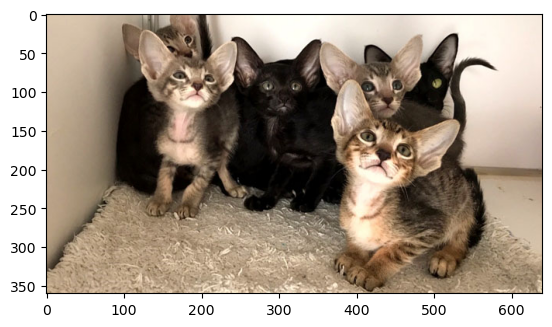

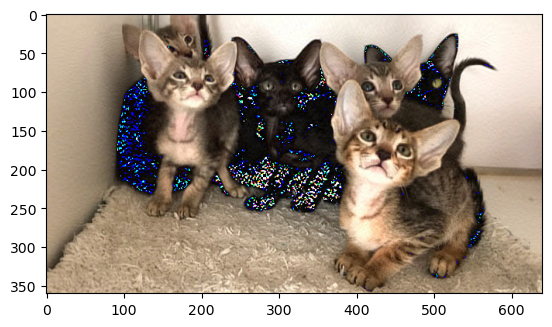

In [4]:
img = image.imread('C:/Users/Egor/Desktop/Ориентальные-котята-5.jpg')

plt.imshow(img_unchanged)
plt.show()

R,G,B = img[:,:,0]/0xff,img[:,:,1]/0xff,img[:,:,2]/0xff

R_U, R_S, R_VT = np.linalg.svd(R)
G_U, G_S, G_VT = np.linalg.svd(G)
B_U, B_S, B_VT = np.linalg.svd(B)

def read_from_shrinked(U, S, VT, k):
    return (U[:,:k] @ np.diag(S[:k])) @ VT[:k]

relative_rank = 0.3
max_rank = int(relative_rank * min(img.shape[0], img.shape[1]))
R_restored = read_from_shrinked(R_U, R_S, R_VT, max_rank)
G_restored = read_from_shrinked(G_U, G_S, G_VT, max_rank)
B_restored = read_from_shrinked(B_U, B_S, B_VT, max_rank)
restored_float = np.dstack((R_restored, G_restored, B_restored))
img_restored = (np.minimum(restored_float, 1.0) * 0xff).astype(np.uint8)

plt.imshow(img_restored)
plt.show()